## Data Generation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
df = pd.DataFrame()
df['Date'] = pd.date_range(start='01/01/2019', end='12/30/2021')
df['Sales'] = np.random.randint(50000, 100000, size=(len(df['Date']), 1))
print(df['Date'])
print(df['Sales'])
# df.to_csv('Sales.csv', index=False)

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
1090   2021-12-26
1091   2021-12-27
1092   2021-12-28
1093   2021-12-29
1094   2021-12-30
Name: Date, Length: 1095, dtype: datetime64[ns]
0       58969
1       53085
2       51421
3       71112
4       58966
        ...  
1090    65850
1091    87820
1092    79546
1093    67476
1094    66185
Name: Sales, Length: 1095, dtype: int32


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 
df = df.set_index('Date')

In [4]:
df.head()


,Sales
Date,
2019-01-01,58969
2019-01-02,53085
2019-01-03,51421
2019-01-04,71112
2019-01-05,58966


## Visualize Time Series

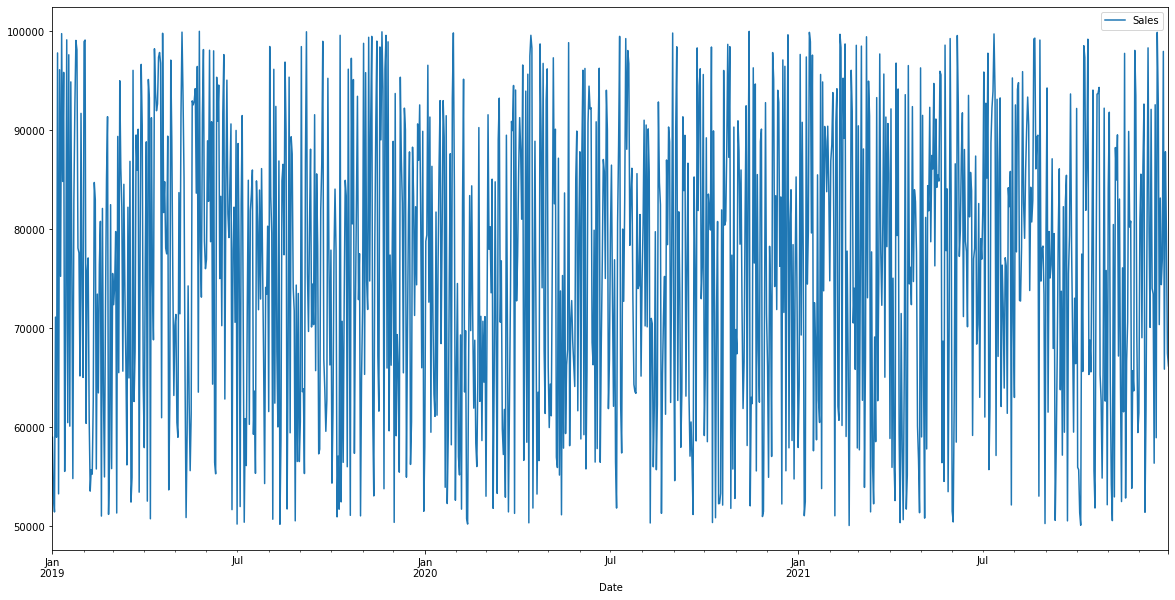

In [5]:
df=df['Sales']
plt.figure(figsize=(20,10))
df.plot() 
plt.legend()

## Determining Stationarity

## With Rolling Statistics

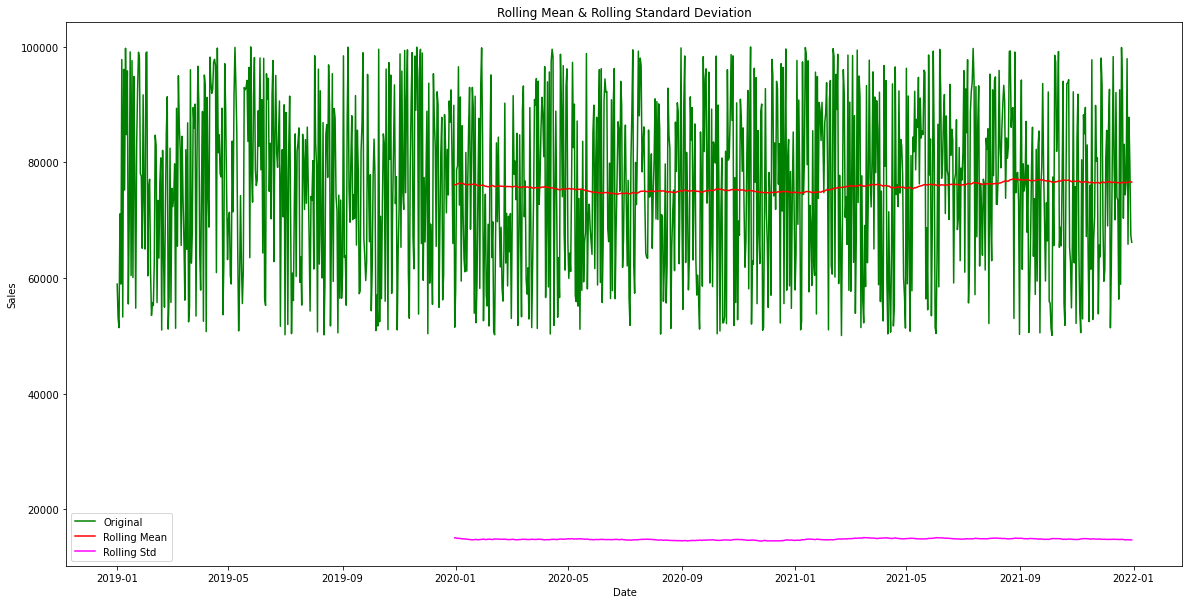

In [6]:
rolling_mean = df.rolling(window=365).mean() 
rolling_std = df.rolling(window=365).std() 
plt.figure(figsize=(20,10)) 
plt.plot(df, color = 'green', label = 'Original') 
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean') 
plt.plot(rolling_std, color = 'magenta', label = 'Rolling Std') 
plt.legend(loc = 'best') 
plt.title('Rolling Mean & Rolling Standard Deviation') 
plt.xlabel('Date') 
plt.ylabel('Sales') 
plt.legend()

In [7]:
#Conclusion From Rolling Statistics: Stationary Data Because Of Constant Mean And Sd

## With Augmented Dickey Fuller Test

In [8]:
from statsmodels.tsa.stattools import adfuller 
adf_test = adfuller(df) 
print('ADF Statistics: {}'.format(adf_test[0])) 
print('p-value: {}'.format(adf_test[1])) 
for key, value in adf_test[4].items(): 
    print('Critical Values Over {}: {}'.format(key, value)) 

ADF Statistics: -32.961043685752166
p-value: 0.0
Critical Values Over 1%: -3.436341508283391
Critical Values Over 5%: -2.864185524365606
Critical Values Over 10%: -2.5681785627437677


In [9]:
#Conclusion From ADF Test: Stationary Data Because p's value is less than 0.005 and ADF statistics is less than critical values

## Train Test Splitting


In [10]:
X_train = df[:-30]
X_test = df[-30:]
print(X_train)
#X_train.to_csv('X-train.csv', index=False)
#X_test.to_csv('X-test.csv', index=False)

Date
2019-01-01    58969
2019-01-02    53085
2019-01-03    51421
2019-01-04    71112
2019-01-05    58966
              ...  
2021-11-26    63658
2021-11-27    98069
2021-11-28    93503
2021-11-29    69164
2021-11-30    59442
Name: Sales, Length: 1065, dtype: int32


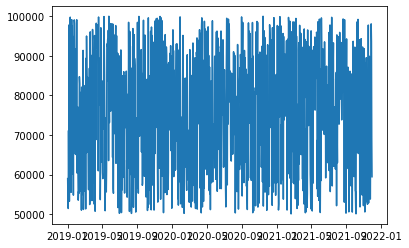

In [11]:
plt.plot(X_train)

## Perform Standard Scaling

In [12]:
 from sklearn.preprocessing import StandardScaler

In [13]:
train_data = pd.read_csv('X-train.csv')
test_data = pd.read_csv('X-test.csv')
scaler = StandardScaler()
train_scaler = scaler.fit(train_data[['Sales']])
standard_train = train_scaler.transform(train_data[['Sales']])
test_scaler = scaler.fit(test_data[['Sales']])
standard_test = test_scaler.transform(test_data[['Sales']])
print('Trained Data')
print(standard_train)
# pd.DataFrame(standard_train).to_csv("standard_train.csv")
print('Testing')
print(standard_test)
# pd.DataFrame(standard_test).to_csv("standard_test.csv")



Trained Data
[[-1.29387543]
 [ 0.25123241]
 [-0.57323225]
 ...
 [ 1.31200196]
 [-1.63906795]
 [ 1.52679304]]
Testing
[[-1.17260214]
 [ 0.47627587]
 [-0.02914558]
 [ 0.43689865]
 [ 1.12431045]
 [ 1.0245916 ]
 [ 0.31635333]
 [ 0.6508873 ]
 [ 1.11417305]
 [-1.7371239 ]
 [ 0.81701641]
 [-1.0072316 ]
 [ 0.63909482]
 [-0.77965747]
 [-0.453261  ]
 [-1.74519244]
 [-1.69891903]
 [ 1.50553159]
 [-0.44250295]
 [ 0.66164535]
 [-0.64504393]
 [ 0.43917439]
 [-1.69009191]
 [ 0.59778667]
 [ 0.71371155]
 [ 1.08176098]
 [ 0.53578996]
 [-0.29713136]
 [ 1.08541596]
 [-1.5225146 ]]


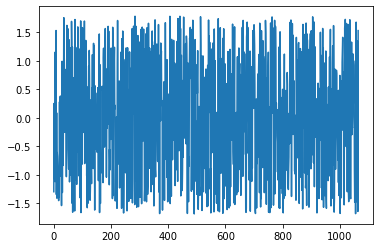

In [14]:
plt.plot(standard_train)

## Determining ACF and PACF

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

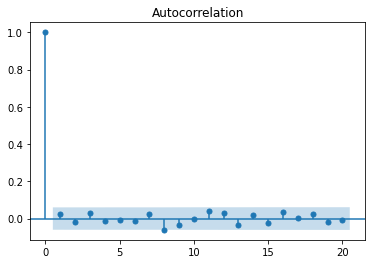

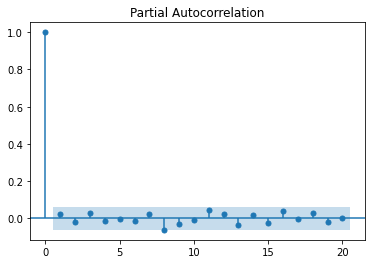

In [31]:
dfs = pd.read_csv('X-train.csv')
dfs1 = pd.read_csv('X-test.csv')
plot_acf(dfs, lags=20);
plot_pacf(dfs, lags=20);

## Build Time Series Model

## ARIMA Model

In [33]:
from statsmodels.tsa.arima.model import ARIMA

In [62]:
model = ARIMA(dfs, order=(1,0,1))
model_fit = model.fit()
model_fit.summary()

C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\dell\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 1065
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -11707.949
Date:                Mon, 28 Feb 2022   AIC                          23423.897
Time:                        16:25:07   BIC                          23443.780
Sample:                             0   HQIC                         23431.431
                               - 1065                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.435e+04    450.373    165.085      0.000    7.35e+04    7.52e+04
ar.L1         -0.7508      0.256     -2.928      0.003      -1.254      -0.248
ma.L1          0.7833      0.241      3.250      0.001       0.311       1.256
sigma2      2.074e+08      0.000   5.84e+11      0.000    2.07e+08    2.07e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                62.12
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.02
Prob(H) (two-sided):                  0.78   Kurtosis:                         1.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.46e+27. Standard errors may be unstable.
"""

## Prediction

In [63]:
dfs1.head()

,Sales,Predict
0,59347,74349.904229
1,83257,73780.336586
2,75928,74908.615195
3,82686,73650.612460
4,92654,74403.167285


In [64]:
dfs1['Predict']=model_fit.predict()


## Evaluate Forecast

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [66]:
rmse = sqrt(mean_squared_error(dfs1['Sales'], dfs1['Predict']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14775.350


## Plotting The Forecast Against Actual Outcome

In [67]:
dfs1.head()

,Sales,Predict
0,59347,74349.904229
1,83257,73780.336586
2,75928,74908.615195
3,82686,73650.612460
4,92654,74403.167285


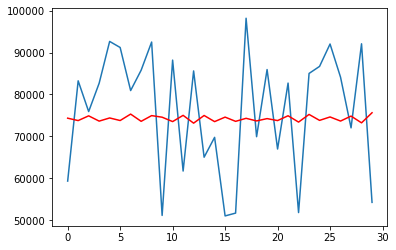

In [68]:
plt.plot(dfs1['Sales'])
plt.plot(dfs1['Predict'], color='red')
plt.show()

## ETS MODEL

In [69]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel

In [1]:
model1 = ETSModel(X_train)
model1_fit = model1.fit()
model1_fit.summary()

NameError: name 'ETSModel' is not defined

## Prediction

In [51]:
dfs1['ETS_predict']=model1_fit.predict()

NameError: name 'model1_fit' is not defined

In [ ]:
dfs1.head()

## Evaluate Forecast

In [ ]:
rmse = sqrt(mean_squared_error(dfs1['0'], dfs1['ETS_predict']))
print('Test RMSE: %.3f' % rmse)

## Plotting The Forecast Against Actual Outcome

In [ ]:
plt.plot(dfs1['0'])
plt.plot(dfs1['ETS_predict'], color='red')
plt.show()


In [ ]:
dfs1

In [ ]:
model.fit()
model.predict()